# Data Exploration

## Set-up Programming Environment

In [313]:
#install and import all necessary libraries

#!{sys.executable} -m pip install pandas
import pandas as pd

#!{sys.executable} -m pip install numpy
import numpy as np

#!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt

#!{sys.executable} -m pip install scipy
import scipy.stats as stats

#!{sys.executable} -m pip install seaborn
import seaborn as sns


## Load and Preview Data

In [314]:
dat = pd.read_csv("~/Desktop/WGU/D207/churn_clean.csv") #load CSV
dat.shape #show number of rows and columns in dataset

(10000, 50)

In [315]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

**NOTE**: no missing values in the dataset

In [316]:
pd.set_option('display.max_columns', 55) #display all the columns
dat.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


## Clean Data

In [317]:
#check for duplicates
sum(dat.duplicated() == True) 

0

In [318]:
#pull out columns to keep
dat = dat[['Churn', 'MonthlyCharge', 'Income', 'Contract']]
dat.head()

,Churn,MonthlyCharge,Income,Contract
0,No,172.455519,28561.99,One year
1,Yes,242.632554,21704.77,Month-to-month
2,No,159.947583,9609.57,Two Year
3,No,119.956840,18925.23,Two Year
4,Yes,149.948316,40074.19,Month-to-month


In [319]:
#express variables as categorical
dat["Churn"] = dat["Churn"].astype("category")
dat["Contract"] = dat["Contract"].astype("category")
dat.dtypes

Churn            category
MonthlyCharge     float64
Income            float64
Contract         category
dtype: object

## Chi Square Test

In [320]:
#get counts of each category
dat_chi = pd.crosstab(dat['Contract'], dat['Churn'])
dat_chi

Churn,No,Yes
Contract,,
Month-to-month,3422,2034
One year,1795,307
Two Year,2133,309


In [321]:
(dat_chi.sum(axis=1)/10000)*100 #calculate the percent of customers with different contract types

Contract
Month-to-month    54.56
One year          21.02
Two Year          24.42
dtype: float64

In [322]:
dat.describe() #statistical summary

,MonthlyCharge,Income
count,10000.000000,10000.000000
mean,172.624816,39806.926771
std,42.943094,28199.916702
min,79.978860,348.670000
25%,139.979239,19224.717500
50%,167.484700,33170.605000
75%,200.734725,53246.170000
max,290.160419,258900.700000


In [323]:
#run chi square test of independence
res = stats.chi2_contingency(dat_chi)
print('statistic: ', res.statistic)
print('pvalue: ', res.pvalue)

statistic:  718.5915805949758
pvalue:  9.116348157571405e-157


## Univariate Statistics

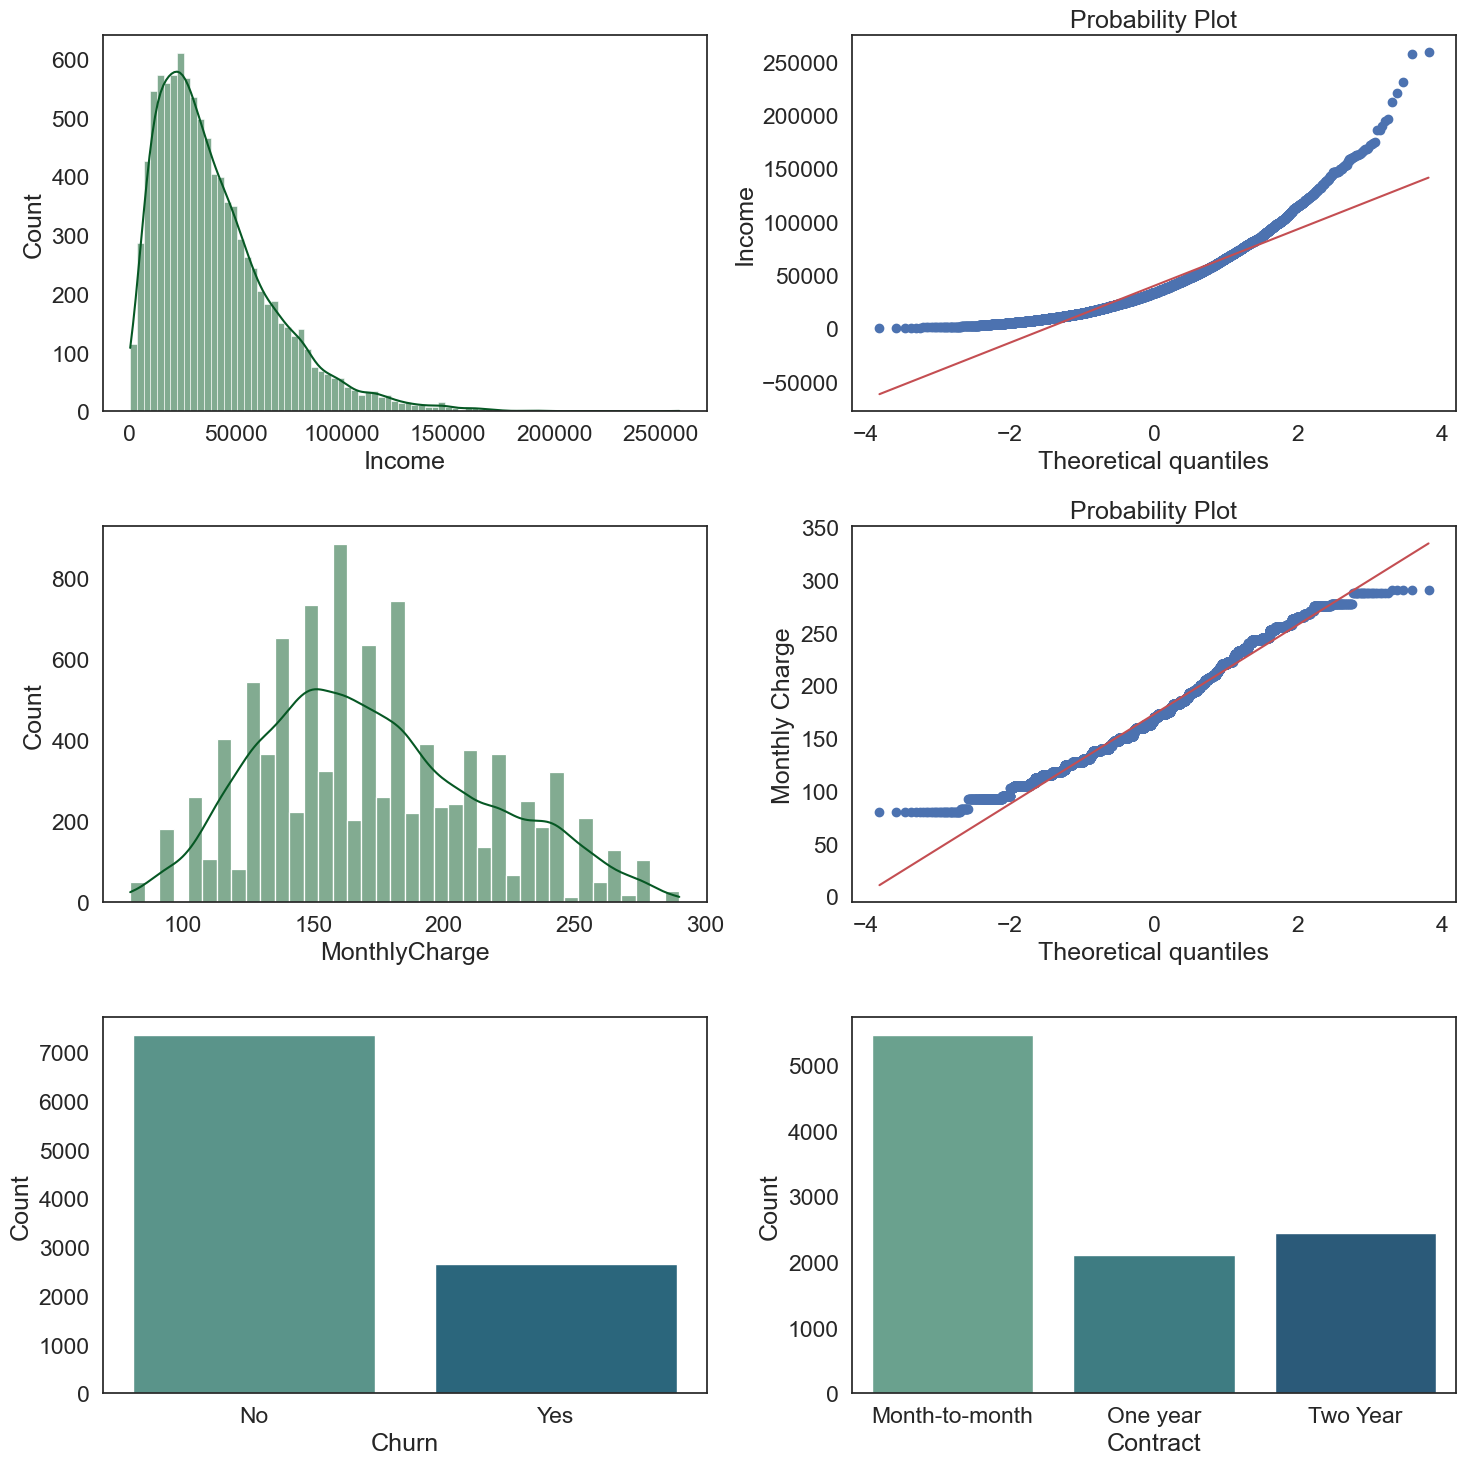

In [324]:
#determine distributions using univariate statistics
sns.set(font_scale=1.5)
sns.set_style("white")
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=False, sharex=False)

ax1 = plt.subplot(3, 2, 1)
c1 = sns.histplot(data=dat, x='Income', kde=True, color = '#065824')

ax2 = plt.subplot(3, 2, 2)
ax2.set_ylabel('Income')
c2 = stats.probplot(dat['Income'], dist="norm", plot=plt)


ax3 = plt.subplot(3, 2, 3)
c3 = sns.histplot(data=dat, x='MonthlyCharge', kde=True, color = '#065824')

ax4 = plt.subplot(3, 2, 4)
ax4.set_ylabel('Monthly Charge')
c4 = stats.probplot(dat['MonthlyCharge'], dist="norm", plot=plt)


ax5 = plt.subplot(3, 2, 5)
c5 = sns.countplot(data=dat, x="Churn", palette="crest")

ax6 = plt.subplot(3, 2, 6)
c6 = sns.countplot(data=dat, x="Contract", palette="crest")

c5.set(ylabel = 'Count')
c6.set(ylabel='Count')
plt.tight_layout()
plt.show()

## Bivariate Statistics

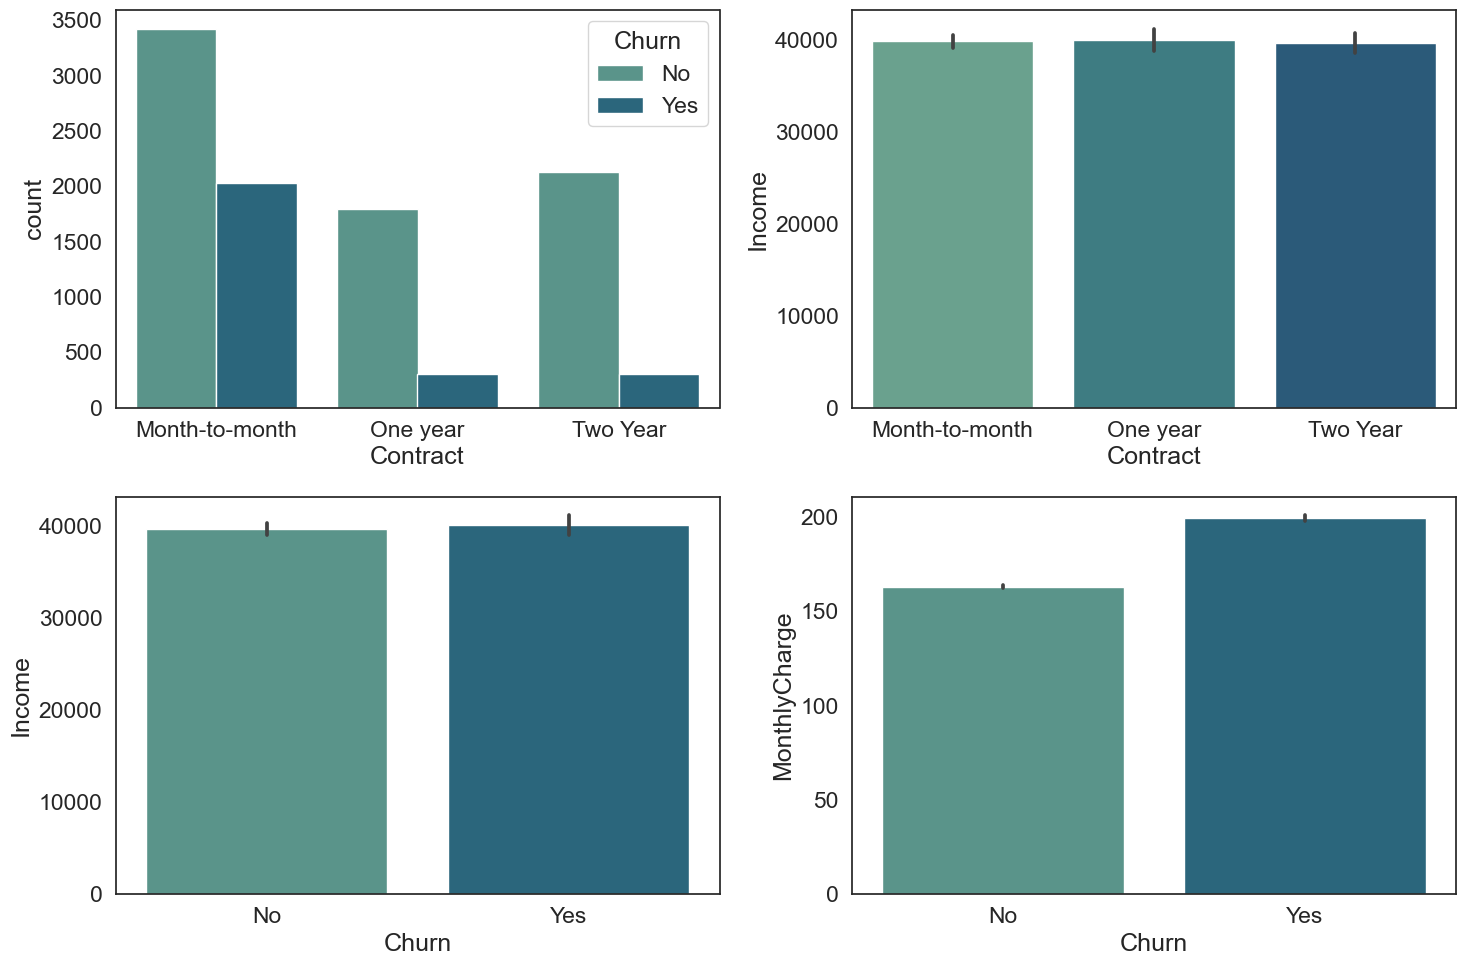

In [325]:
#determine distributions using bivariate statistics
sns.set(font_scale=1.5)
sns.set_style("white")
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False, sharex=False)
c1 = sns.countplot(data=dat, x="Contract",  hue="Churn", palette="crest", ax=axes[0,0])
c2 = sns.barplot(data=dat, y='Income', x="Churn", palette="crest", ax=axes[1,0])
c3 = sns.barplot(data=dat, y='Income', x="Contract", palette="crest", ax=axes[0,1])
c4 = sns.barplot(data=dat, y="MonthlyCharge",  x="Churn", palette="crest", ax=axes[1,1])
#c4 = sns.histplot(data=dat, x="Tenure", hue = "Contract", palette="crest", ax=axes[1,1])
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

In [326]:
#calculate percent of customers with "yes" churn for each contract type
dat_chi['perc_churn'] = (dat_chi['Yes']/dat_chi.sum(axis=1))*100
dat_chi

Churn,No,Yes,perc_churn
Contract,,,
Month-to-month,3422,2034,37.280059
One year,1795,307,14.605138
Two Year,2133,309,12.653563
